# Time series analysis with SARIMA


## Import libraries and get sample data

In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns

# Defaults
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

sns.set_style("whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data
df = pd.read_csv("velo2021.csv")

from preprocess import *

preprocess(df)






/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/content/preprocess.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']=df['Time'].replace('', np.nan)
/content/prep

,TodayTotal,DayofWeek,Day,Month,Year,Hour,Minute
Time,,,,,,,
2020-03-12 11:05:00,109.0,3,12,3,2020,11,5
2020-03-12 14:30:00,441.0,3,12,3,2020,14,30
2020-03-13 10:02:00,385.0,4,13,3,2020,10,2
2020-03-13 14:15:00,769.0,4,13,3,2020,14,15
2020-03-13 18:21:00,1286.0,4,13,3,2020,18,21
...,...,...,...,...,...,...,...
2021-03-24 10:08:00,497.0,2,24,3,2021,10,8
2021-03-24 11:18:00,603.0,2,24,3,2021,11,18
2021-03-24 14:46:00,1002.0,2,24,3,2021,14,46


In [3]:
df = preprocess(df)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/content/preprocess.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']=df['Time'].replace('', np.nan)
/content/prep

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

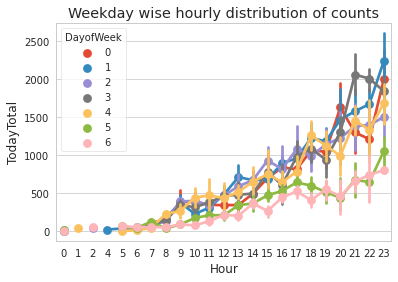

In [4]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['Hour','TodayTotal','DayofWeek']],
              x='Hour',
              y='TodayTotal',
              hue='DayofWeek',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Month wise hourly distribution of counts')]

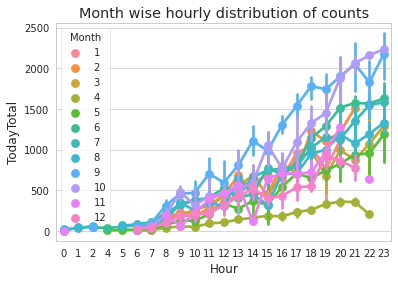

In [5]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['Hour','TodayTotal','Month']],
              x='Hour',
              y='TodayTotal',
              hue='Month',
              ax=ax)
ax.set(title="Month wise hourly distribution of counts")

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

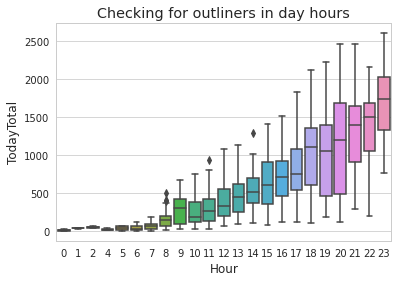

In [6]:
fig,ax = plt.subplots()

sns.boxplot(data=df[['TodayTotal','Hour']],x='Hour',y='TodayTotal',ax=ax)

ax.set(title="Checking for outliners in day hours")

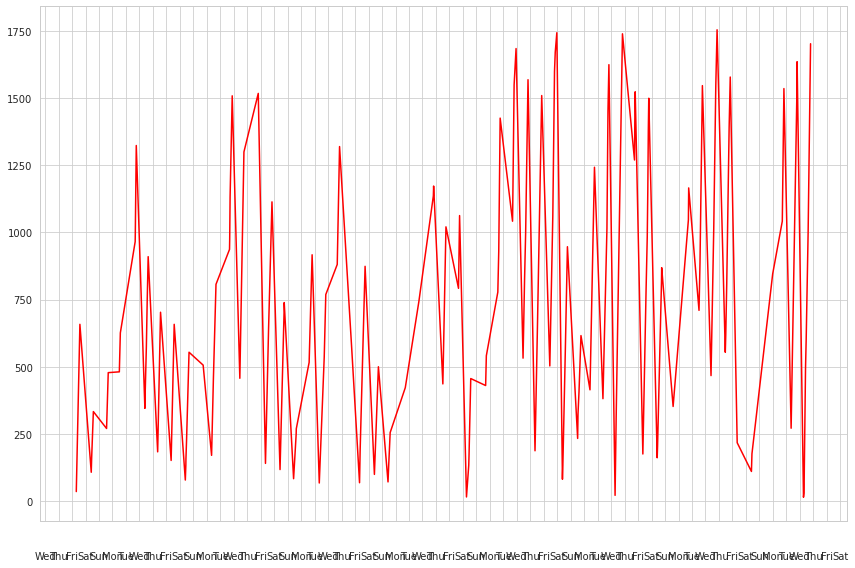

In [7]:
timeseries_plot(df["TodayTotal"][-200:], 'r', '')

In [8]:
bucket_avg(df[-200:], "3H")

,TodayTotal,DayofWeek,Day,Month,Year,Hour,Minute
Time,,,,,,,
2021-01-29 06:00:00,35.000000,4.0,29.0,1.0,2021.0,7.0,35.000000
2021-01-29 09:00:00,439.000000,4.0,29.0,1.0,2021.0,11.0,43.000000
2021-01-29 12:00:00,658.000000,4.0,29.0,1.0,2021.0,14.0,0.000000
2021-01-29 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-29 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-24 06:00:00,66.200000,2.0,24.0,3.0,2021.0,7.0,27.600000
2021-03-24 09:00:00,518.333333,2.0,24.0,3.0,2021.0,10.0,25.666667
2021-03-24 12:00:00,1002.000000,2.0,24.0,3.0,2021.0,14.0,46.000000


In [9]:
d_tt = df.copy()
d_tt = d_tt[(d_tt.index.time >= pd.to_datetime("00:01:00").time()) & (d_tt.index.time <= pd.to_datetime("10:01:00").time())]
d_tt

,TodayTotal,DayofWeek,Day,Month,Year,Hour,Minute
Time,,,,,,,
2020-03-15 09:05:50,50.0,6,15,3,2020,9,5
2020-03-15 09:53:00,70.0,6,15,3,2020,9,53
2020-03-16 06:57:00,14.0,0,16,3,2020,6,57
2020-03-16 08:12:00,74.0,0,16,3,2020,8,12
2020-03-16 08:24:00,93.0,0,16,3,2020,8,24
...,...,...,...,...,...,...,...
2021-03-24 07:19:00,29.0,2,24,3,2021,7,19
2021-03-24 07:40:00,62.0,2,24,3,2021,7,40
2021-03-24 07:50:00,99.0,2,24,3,2021,7,50


In [10]:
bucket_size = 'D'

df_avg = bucket_avg(d_tt["TodayTotal"], bucket_size)

# df_avg = pd.DataFrame(df_avg)

# df_avg.index = pd.to_datetime(df_avg.index, format = '%d/%m/%Y %H:%M:%S')

df_avg

Time
2020-03-15     60.000000
2020-03-16     60.333333
2020-03-17     73.333333
2020-03-18     26.000000
2020-03-19     12.000000
                 ...    
2021-03-20    110.000000
2021-03-21           NaN
2021-03-22           NaN
2021-03-23    271.000000
2021-03-24    131.000000
Freq: D, Name: TodayTotal, Length: 375, dtype: float64

ARIMA(1, 1, 1)x(1, 1, 1, 10)seasonal - AIC:2488.9283877038592
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SARIMAX(1, 1, 1)x(1, 1, 1, 10)seasonal with lowest_AIC:2488.9283877038592
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Final model summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1172      0.093      1.266      0.205      -0.064       0.299
ma.L1         -0.8407      0.039    -21.608      0.000      -0.917      -0.764
ar.S.L10      -0.3468      0.077     -4.515      0.000      -0.497      -0.196
ma.S.L10      -1.0001     34.878     -0.029      0.977     -69.360      67.360
sigma2      1.144e+04   3.99e+05      0.029      0.977   -7.72e+05    7.94e+05
Final model diagnostics:


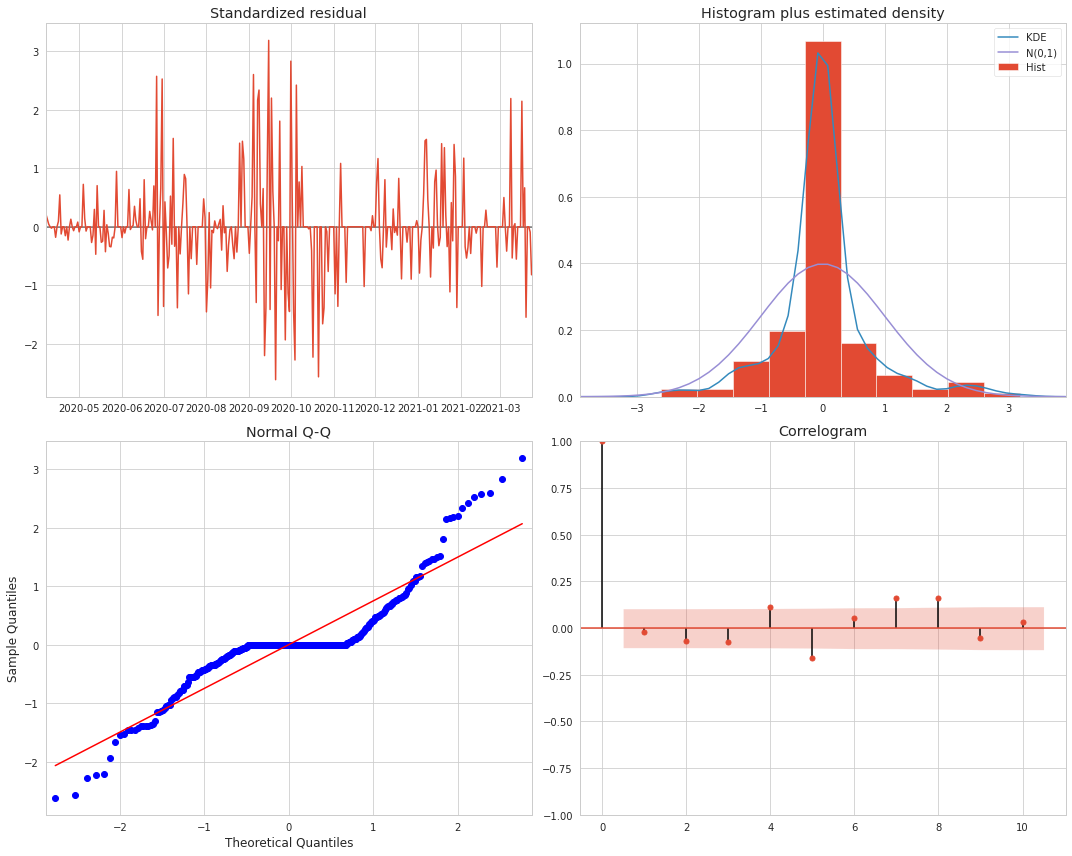

In [11]:
from arima_method import *


arima_param = {}
arima_param['p'] = range(1,2,1)
arima_param['d'] = range(1,2,1)
arima_param['q'] = range(1,2,1)



# the seasonal periodicy is  24 hours

seasonal_param = 10
# round(24*60/float((bucket_size[:-1])))
arima = arima_model(arima_param, seasonal_param)

arima.fit(df_avg)

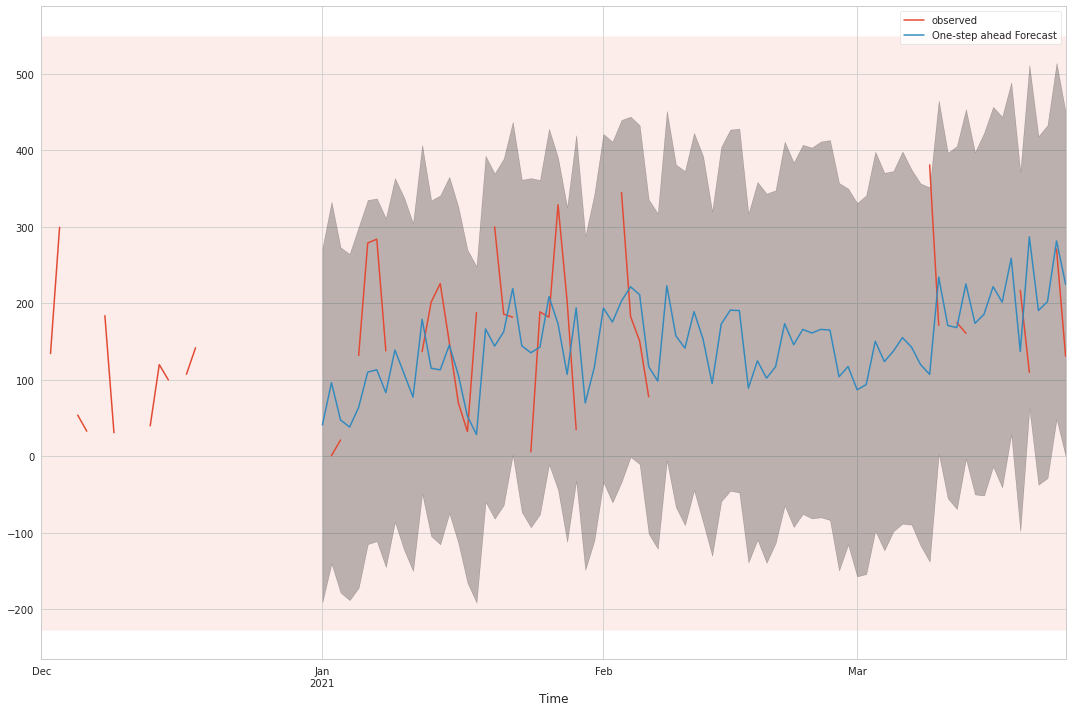

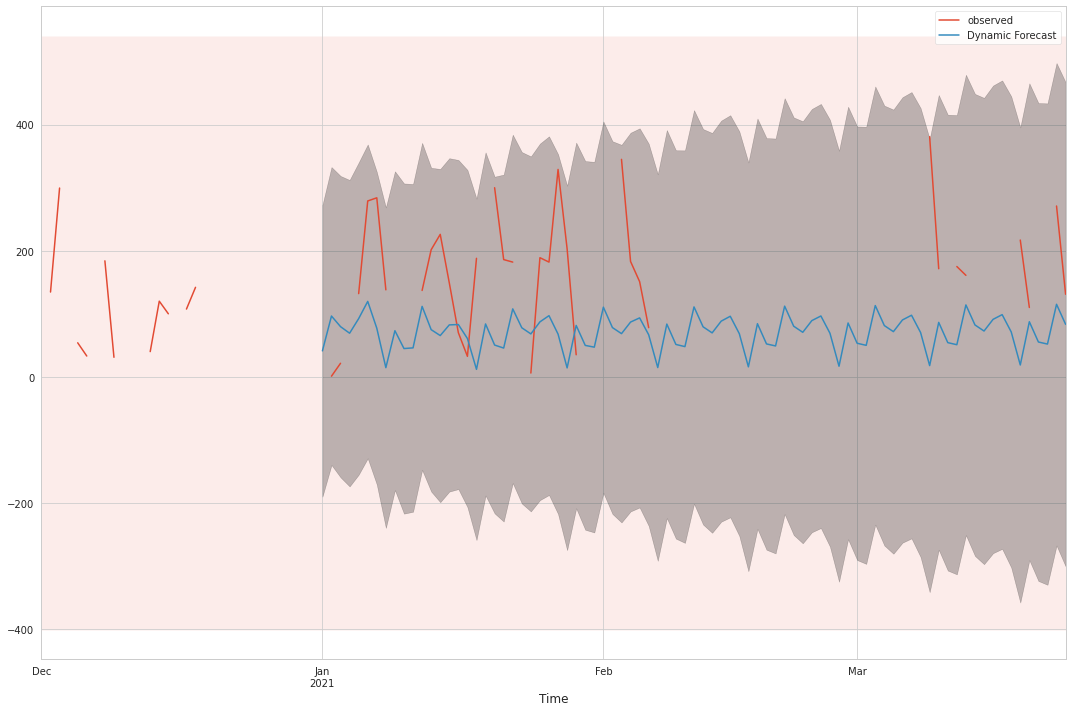

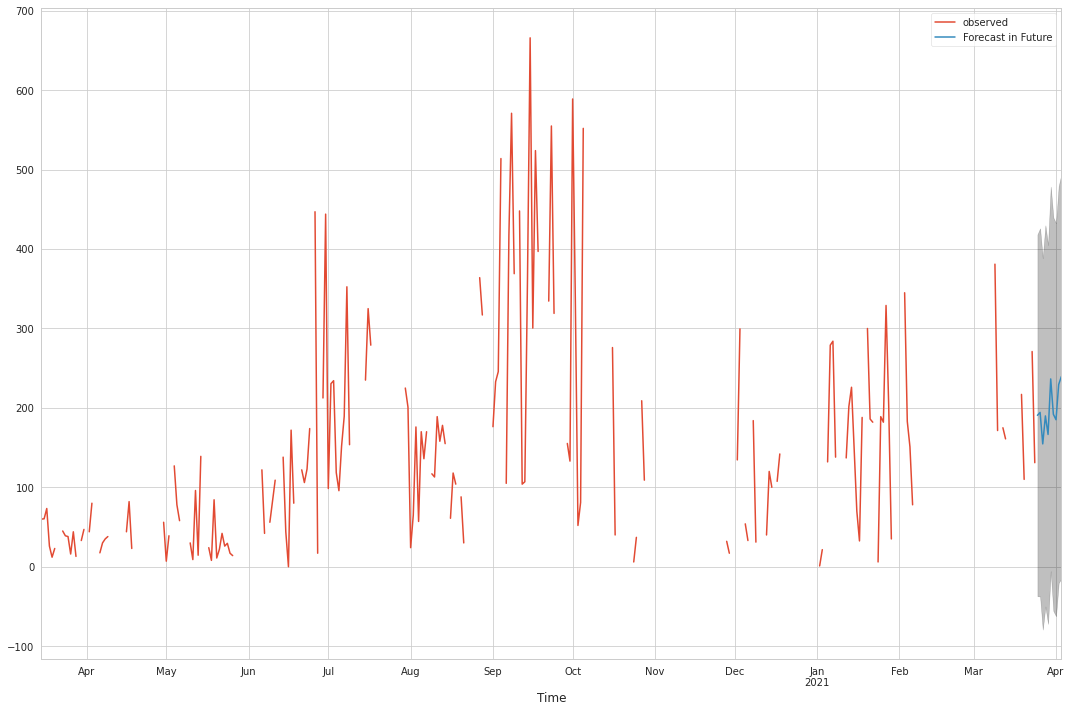

2021-03-25    190.645136
2021-03-26    194.343438
2021-03-27    154.657487
2021-03-28    189.917614
2021-03-29    166.554576
2021-03-30    236.491733
2021-03-31    191.979963
2021-04-01    185.102525
2021-04-02    229.415390
2021-04-03    239.439852
Freq: D, dtype: float64

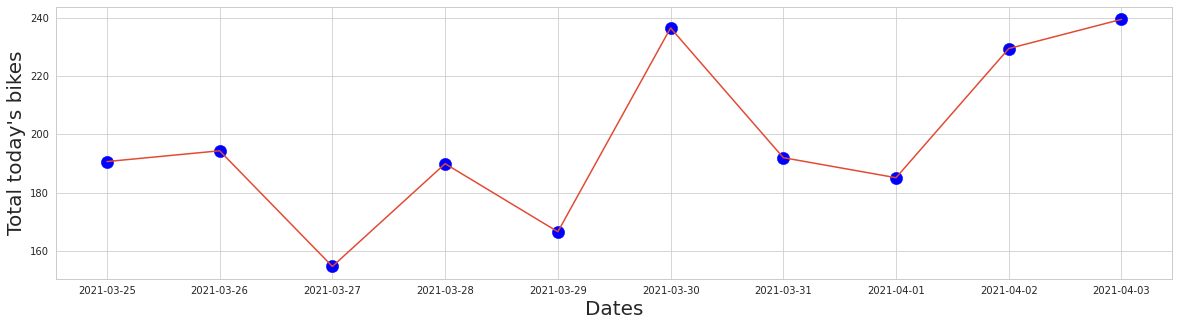

In [12]:
from arima_method import *


# Prediction on observed data starting on pred_start
# observed and prediction starting dates in plots
plot_start = '2020-12-01 00:00:00'
pred_start = '2021-01-01 00:00:00'

ts_label = ''

# One-step ahead forecasts
dynamic = False
arima.pred(df_avg, plot_start, pred_start, dynamic, ts_label)

# Dynamic forecasts
dynamic = True
arima.pred(df_avg, plot_start, pred_start, dynamic, ts_label)

# Forecasts to unseen future data
n_steps = 10  # next step * bucket size (30 min, 1D...) In this case = 10*1D = 50 days
arima.forcast(df_avg, n_steps, ts_label)

#

arima.plot_forecast(n_steps)

arima.d_forecast(n_steps, n=20)




